In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ..
import os, sys
sys.path.insert(0, os.path.dirname(os.path.dirname(os.path.abspath(os.getcwd()))))

/Users/Tony/Other Docs/distilling-and-forgetting-in-large-pre-trained-models


In [3]:
from pathlib import Path
import pandas as pd

In [4]:
dirpath = Path("outputs/vanilla/tiny/k_beam_study/")
assert dirpath.is_dir()

In [5]:
sorted(list(dirpath.glob("*")))

[PosixPath('outputs/vanilla/tiny/k_beam_study/whisper-tiny-ami_10h-k_1.csv'),
 PosixPath('outputs/vanilla/tiny/k_beam_study/whisper-tiny-ami_10h-k_2.csv'),
 PosixPath('outputs/vanilla/tiny/k_beam_study/whisper-tiny-ami_10h-k_3.csv'),
 PosixPath('outputs/vanilla/tiny/k_beam_study/whisper-tiny-ami_10h-k_4.csv'),
 PosixPath('outputs/vanilla/tiny/k_beam_study/whisper-tiny-ami_10h-k_5.csv')]

In [6]:
list_df = [pd.read_csv(filepath).assign(k=filepath.stem) for filepath in dirpath.glob("*")]
df = pd.concat(list_df).reset_index(drop=True)
df["k"] = df["k"].str.extract(r'[\w+]-k_(\d+)')
df = df.set_index("k").sort_index()

df

,Dataset,WER (%),Sub (%),Del (%),Ins (%)
k,,,,,
1,ami,34.67,17.12,10.04,7.51
2,ami,37.48,15.69,9.89,11.90
3,ami,39.74,15.52,9.45,14.77
4,ami,50.88,15.46,9.22,26.19
5,ami,62.30,15.56,9.09,37.66


<Axes: xlabel='k'>

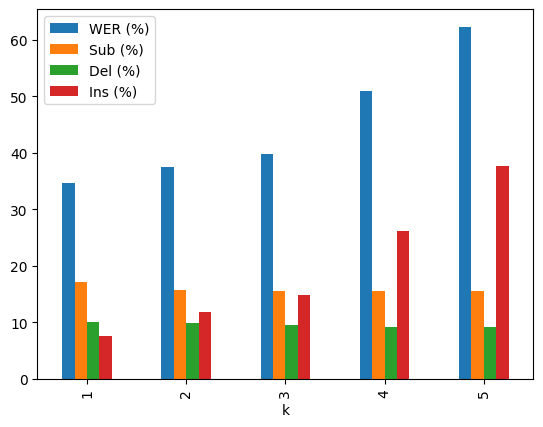

In [7]:
df.plot.bar()